In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
import seaborn as sns
from wordcloud import WordCloud

df_heart = pd.read_csv('heart.csv')

binary_columns = ""



genHealth = [ 'Poor',  'Fair', 'Good', 'Very good', 'Excellent']
sex = ['Male','Female']
ageCategory =  {'18-24',  '25-29','30-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64','65-69', '70-74', '75-79',  '80 or older'}
race =  ['White', 'Hispanic', 'Other', 'American Indian/Alaskan Native', 'Black', 'Asian']
diabetic =  ['No', 'No, borderline diabetes',  'Yes',  'Yes (during pregnancy)']
bolean = ['No','Yes']

binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
                  'DiffWalking', 'PhysicalActivity', 'Asthma', 
                  'KidneyDisease', 'SkinCancer']

df_heart[binary_columns] = df_heart[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


df_heart['GenHealth'] = pd.Categorical(df_heart['GenHealth'], categories=genHealth, ordered=True)
df_heart['GenHealth'] = df_heart['GenHealth'].cat.codes

df_heart['Sex'] = pd.Categorical(df_heart['Sex'], categories=sex, ordered=True)
df_heart['Sex'] = df_heart['Sex'].cat.codes

df_heart['AgeCategory'] = pd.Categorical(df_heart['AgeCategory'], categories=ageCategory, ordered=True)
df_heart['AgeCategory'] = df_heart['AgeCategory'].cat.codes

df_heart['Race'] = pd.Categorical(df_heart['Race'], categories=race, ordered=True)
df_heart['Race'] = df_heart['Race'].cat.codes

df_heart['Diabetic'] = pd.Categorical(df_heart['Diabetic'], categories=diabetic, ordered=True)
df_heart['Diabetic'] = df_heart['Diabetic'].cat.codes
df_heart = df_heart.sample(frac=1).reset_index(drop=True)
df_heart = df_heart[:10000]

print(df_heart)



      HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                0  32.61        1                0       0            20.0   
1                0  24.69        0                1       0             0.0   
2                0  24.14        0                0       0             0.0   
3                0  27.50        0                0       0             3.0   
4                0  21.11        0                0       0             0.0   
...            ...    ...      ...              ...     ...             ...   
9995             0  20.67        0                0       0             0.0   
9996             0  27.27        0                0       0             0.0   
9997             0  36.62        0                1       0             0.0   
9998             0  18.54        1                0       0             0.0   
9999             0  23.87        1                0       0             0.0   

      MentalHealth  DiffWalking  Sex  AgeCategory  

## 1. Зниження розмірності і візуалізація даних

In [207]:
X = df_heart.drop('BMI', axis=1)
y = df_heart['BMI']


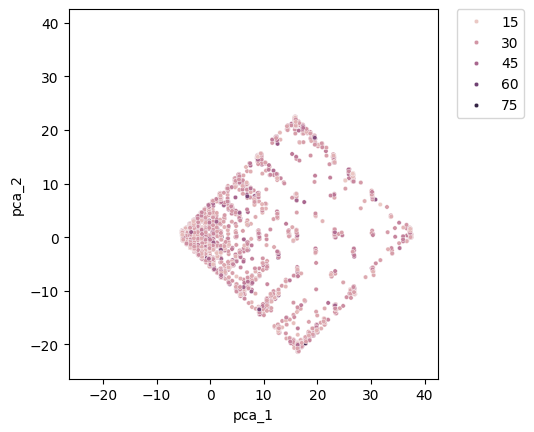

In [208]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

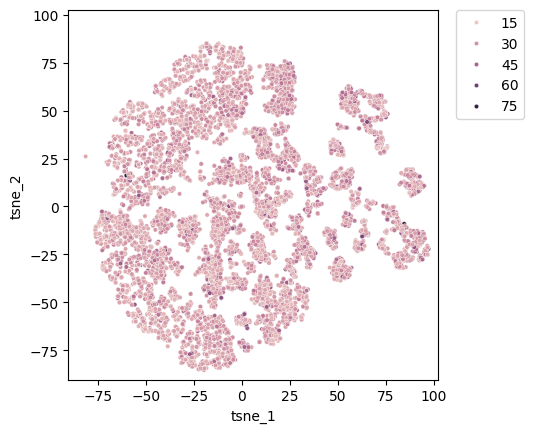

In [209]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# 2. Кластерний аналіз


Fitting model on a small sub-sample of the data
done in 0.010s.
Predicting color indices on the full image (k-means)
done in 0.001s.
Fitting model on a small sub-sample of the data
done in 0.006s.
Predicting color indices on the full image (k-means)
done in 0.001s.
Fitting model on a small sub-sample of the data
done in 0.004s.
Predicting color indices on the full image (k-means)
done in 0.002s.
Fitting model on a small sub-sample of the data
done in 0.005s.
Predicting color indices on the full image (k-means)
done in 0.001s.


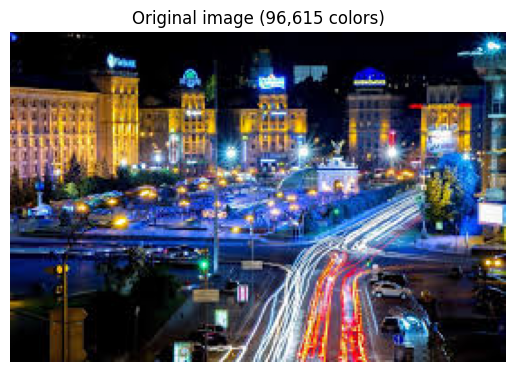

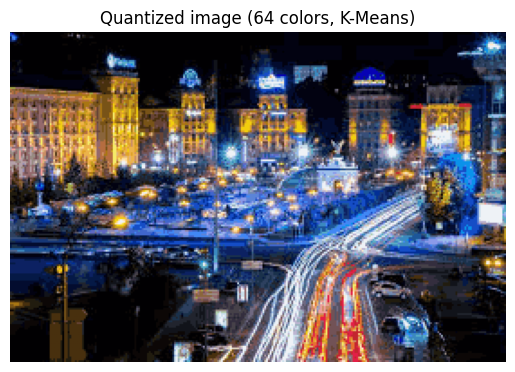

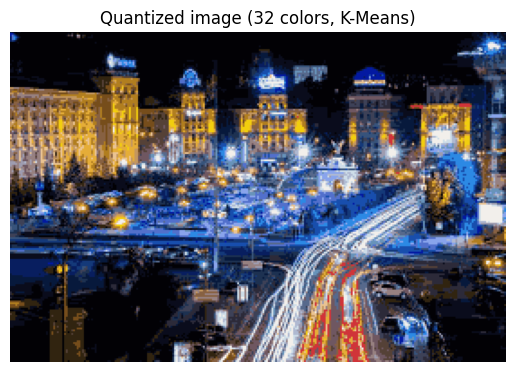

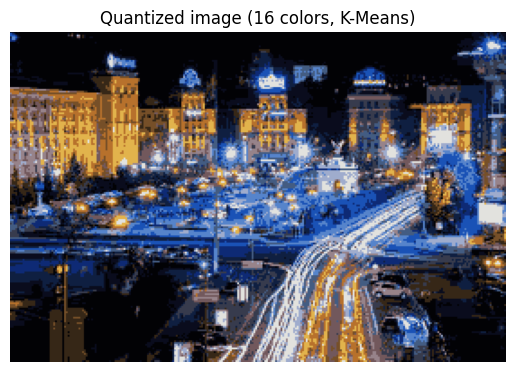

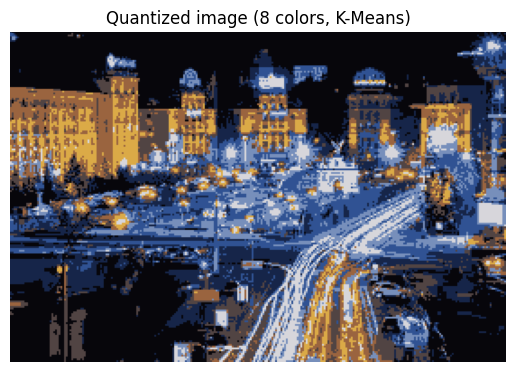

In [210]:
from PIL import Image

n_colors = 32

kyiv = Image.open('k.jpeg')

kyiv = np.array(kyiv, dtype=np.float64) / 255

w, h, d = original_shape = tuple(kyiv.shape)
assert d == 3
image_array = np.reshape(kyiv, (w * h, d))




def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

def kQuant(n):

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")

    plt.figure()
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))



# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(kyiv)

kQuant(64)
kQuant(32)
kQuant(16)
kQuant(8)





In [211]:
df = pd.read_csv('reddit_depression_dataset.csv')
print(df.size)
print("Пропуски у даних:\n", df.isnull().sum())
df = df.dropna()


/var/folders/bc/rcgkn6p91vq7pnqphwwsg_380000gn/T/ipykernel_17758/4274290885.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reddit_depression_dataset.csv')


19766224
Пропуски у даних:
 Unnamed: 0           3
subreddit           20
title               23
body            461051
upvotes             64
created_utc        106
num_comments    113977
label              106
dtype: int64


# 3. Обробка та класифікація текстових даних


In [212]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string



columns = ['subreddit','body']

df_c = pd.DataFrame( columns=columns)

stop_words = stopwords.words("english")

def clean_text(text):
    text = re.sub("\d", " ", text)
    text = text.lower()
    text = re.sub("https*\S+", " ", text)
    text = re.sub("@\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text


Empty DataFrame
Columns: [subreddit, body]
Index: []
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',

In [213]:

df_c['body'] = df['body'].apply(clean_text) 
df_c['subreddit'] = df['subreddit']
df_c1 = df_c.copy()
print(df_c1)

            subreddit                                               body
1        DeepThoughts  anyway human morality joke long abscence hope ...
2        DeepThoughts  hello new guy charge besides thegood ofc bring...
4        DeepThoughts  could take one cell body kill would still yet ...
5        DeepThoughts             personally think infinite always grow 
7        DeepThoughts  hello christmas hosting contest ever post best...
...               ...                                                ...
2470773    depression  argued mom hour ago always feels attacked ever...
2470774    depression  ok basically non friend family invited christm...
2470775    depression                         today gonna ok push little
2470776    depression  know recently realized last friend really care...
2470777    depression                                 sucked god help us

[1925427 rows x 2 columns]


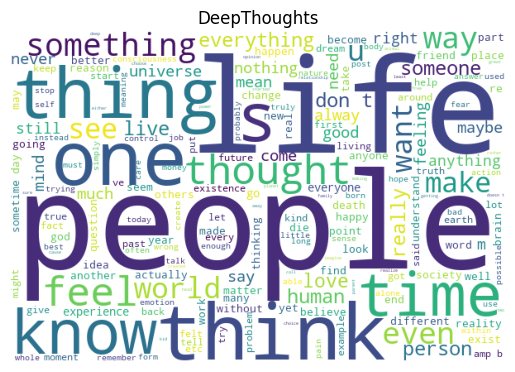

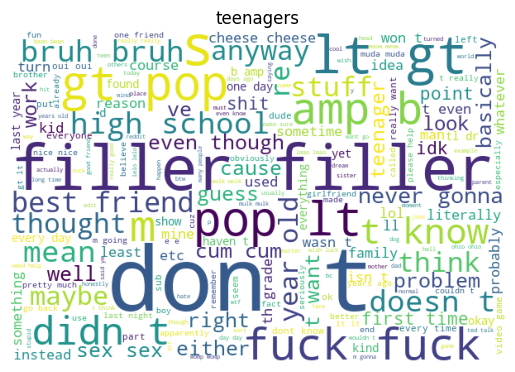

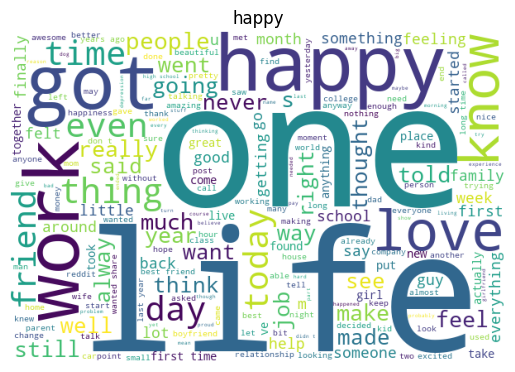

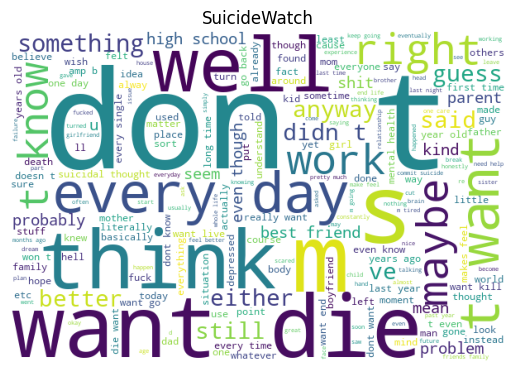

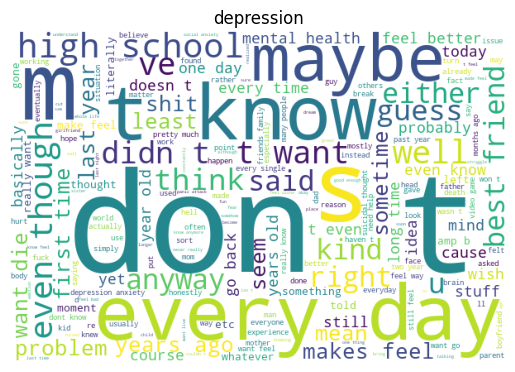

In [214]:
sr = ['DeepThoughts', 'teenagers', 'happy', 'SuicideWatch', 'depression']

def visualize(label):
    text = ''
    for msg in df_c[df_c['subreddit'] == label]['body']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.title(label)
    plt.axis('off')
    plt.show()

for i in range(5):
    visualize(sr[i])



In [215]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.datasets import fetch_20newsgroups


df_c1['subreddit'] = df_c1['subreddit'].replace('SuicideWatch', 'depression')
df_c1 = df_c1[df_c1['subreddit'] != 'teenagers']
print(df_c)

            subreddit                                               body
1        DeepThoughts  anyway human morality joke long abscence hope ...
2        DeepThoughts  hello new guy charge besides thegood ofc bring...
4        DeepThoughts  could take one cell body kill would still yet ...
5        DeepThoughts             personally think infinite always grow 
7        DeepThoughts  hello christmas hosting contest ever post best...
...               ...                                                ...
2470773    depression  argued mom hour ago always feels attacked ever...
2470774    depression  ok basically non friend family invited christm...
2470775    depression                         today gonna ok push little
2470776    depression  know recently realized last friend really care...
2470777    depression                                 sucked god help us

[1925427 rows x 2 columns]


In [220]:

X_train, X_test, y_train, y_test = train_test_split(df_c1['body'], df_c1['subreddit'], test_size=0.3)

tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=1000).fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

DeepThoughts       0.73      0.06      0.11      1925
  depression       0.96      1.00      0.98    127684
       happy       0.62      0.04      0.07      3941

    accuracy                           0.96    133550
   macro avg       0.77      0.36      0.39    133550
weighted avg       0.94      0.96      0.94    133550

